In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


### Reading the merged dataframe

In [2]:
data = pd.read_csv('../Data/Final_table.csv')
data.head()

,datetime_beginning_ept,MIDATL_solar,OTHER_solar,RFC_solar,RTO_solar,SOUTH_solar,WEST_solar,MIDATL_wind,OTHER_wind,RFC_wind,...,DOM_forecast,DUQ_forecast,EKPC_forecast,MIDATL_forecast,RTO_forecast,DPL_historical_da,forecast_gen_outage_mw_rto,forecast_gen_outage_mw_west,forecast_gen_outage_mw_other,Henry Hub Natural Gas Spot Price (Dollars per Million Btu)
0,18/02/2022 00:00:00 AM,0.282,0.0,0.041,0.0,0.0,0.0,957.466,0.0,5625.364,...,9663.6,1254.400000,1313.6,24893.800000,78417.800000,38.95,2928.770833,257.166667,2671.604167,4.61
1,18/02/2022 01:00:00 AM,0.246,0.0,0.000,0.0,0.0,0.0,939.014,0.0,5291.098,...,9394.8,1233.000000,1334.2,24153.400000,76642.200000,36.43,2928.770833,257.166667,2671.604167,4.61
2,18/02/2022 02:00:00 AM,0.300,0.0,0.060,0.0,0.0,0.0,904.381,0.0,4676.792,...,9239.4,1224.200000,1365.4,23656.600000,75794.400000,36.36,2928.770833,257.166667,2671.604167,4.61
3,18/02/2022 03:00:00 AM,0.254,0.0,0.015,0.0,0.0,0.0,889.508,0.0,3968.681,...,9250.6,1229.000000,1428.8,23673.400000,75983.400000,36.59,2928.770833,257.166667,2671.604167,4.61
4,18/02/2022 04:00:00 AM,0.270,0.0,0.034,0.0,0.0,0.0,863.901,0.0,3413.737,...,9458.5,1270.166667,1537.0,24108.166667,77849.166667,38.60,2928.770833,257.166667,2671.604167,4.61


### Splitting the dataframe into test and training sets

In [4]:
feature_var = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28]]
target_var = data['DPL_historical_da']

X_train, X_test, y_train, y_test = train_test_split(feature_var, target_var, test_size=0.2, random_state=156)

# Feature Selection

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression

# Initiate the SelectKBest model
model_fc = SelectKBest(score_func=f_classif, k=5)
model_fr = SelectKBest(score_func=f_regression, k=5)
# Fit the model to all data
data_new_fc = model_fc.fit(X_train, y_train)
data_new_fr = model_fr.fit(X_train, y_train)
# Check the selected features
print("ANOVA stands for analysis of variance. This test evaluates the difference between the means of two or more groups. In feature selection, we use this F-value to determine if the mean feature value for each class of the target variable is significantly different.")
print("f_classif: ", data_new_fc.get_feature_names_out())
print('\n')
print("the F-test method computes the F-statistic for each feature, measuring the linear dependency between the feature and the target")
print("f_regression: ", data_new_fr.get_feature_names_out())


ANOVA stands for analysis of variance. This test evaluates the difference between the means of two or more groups. In feature selection, we use this F-value to determine if the mean feature value for each class of the target variable is significantly different.
f_classif:  ['APS_forecast' 'DOM_forecast' 'MIDATL_forecast' 'RTO_forecast'
 'Henry Hub Natural Gas Spot Price (Dollars per Million Btu)']


the F-test method computes the F-statistic for each feature, measuring the linear dependency between the feature and the target
f_regression:  ['APS_forecast' 'DOM_forecast' 'DUQ_forecast' 'MIDATL_forecast'
 'RTO_forecast']


### Observing the details between variane and linear dependancy 

In [47]:
df_fc = pd.DataFrame({'column':X_train.columns, 'p':data_new_fc.pvalues_, 'score':data_new_fc.scores_})
df_fc

,column,p,score
0,MIDATL_solar,9.981259e-01,0.932587
1,OTHER_solar,9.231637e-01,0.966231
2,RFC_solar,1.000000e+00,0.869332
3,RTO_solar,9.865319e-01,0.948122
4,SOUTH_solar,3.895932e-01,1.006782
5,WEST_solar,1.000000e+00,0.847247
6,MIDATL_wind,6.052945e-02,1.038062
7,OTHER_wind,1.977781e-14,1.200148
8,RFC_wind,3.885233e-02,1.043424
9,RTO_wind,4.026001e-02,1.043010


In [48]:
df_fr = pd.DataFrame({'column':X_train.columns, 'p':data_new_fr.pvalues_, 'score':data_new_fr.scores_})
df_fr

,column,p,score
0,MIDATL_solar,4.314309e-04,12.396915
1,OTHER_solar,1.621033e-14,59.073657
2,RFC_solar,2.324530e-01,1.425914
3,RTO_solar,4.993892e-11,43.248773
4,SOUTH_solar,2.013522e-21,90.631712
5,WEST_solar,4.108755e-01,0.676307
6,MIDATL_wind,3.629753e-11,43.875107
7,OTHER_wind,1.044979e-04,15.062410
8,RFC_wind,6.042673e-10,38.362206
9,RTO_wind,2.165348e-10,40.371853


Index(['datetime_beginning_ept', 'MIDATL_solar', 'OTHER_solar', 'RFC_solar',
       'RTO_solar', 'SOUTH_solar', 'WEST_solar', 'MIDATL_wind', 'OTHER_wind',
       'RFC_wind', 'RTO_wind', 'SOUTH_wind', 'WEST_wind', 'AEP_forecast',
       'APS_forecast', 'ATSI_forecast', 'COMED_forecast', 'DAY_forecast',
       'DEOK_forecast', 'DOM_forecast', 'DUQ_forecast', 'EKPC_forecast',
       'MIDATL_forecast', 'RTO_forecast', 'DPL_historical_da',
       'forecast_gen_outage_mw_rto', 'forecast_gen_outage_mw_west',
       'forecast_gen_outage_mw_other',
       'Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'],
      dtype='object')

# Lasso Regression

In [76]:
from sklearn import metrics
from sklearn.linear_model import Lasso

# Initiate the model
model_la = Lasso(alpha=0.1)

# Fit the model to train set
model_la.fit(X_train, y_train)

# Predict in test set
predict = model_la.predict(X_test)

# Evaluate the performance of the model using MSE
print('mse: ',metrics.mean_squared_error(predict, y_test))
print('mape: ',metrics.mean_absolute_percentage_error(predict, y_test))

mse:  1179.256458504564
mape:  1.376225755881477


/Users/leventeren/Documents/446-ML/New_Final_Project/MSCI_446_ML_Course_Project/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.474e+06, tolerance: 3.687e+03
  model = cd_fast.enet_coordinate_descent(


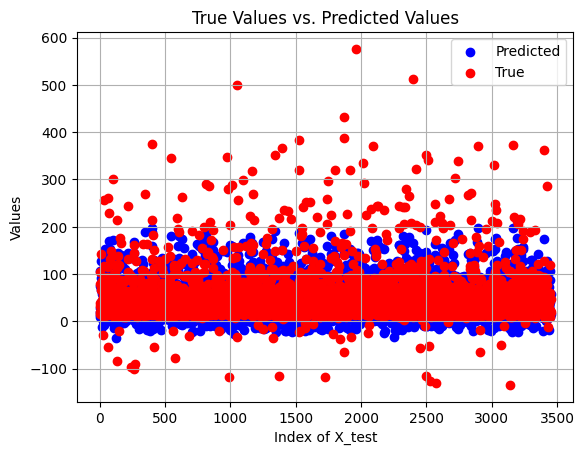

In [75]:
import matplotlib.pyplot as plt

# Assuming X_test, y_test, and predict are your input features, true values, and predicted values respectively

# Create index for X_test
index = range(len(X_test))

# Plotting
plt.scatter(index, predict, color='blue', label='Predicted')
plt.scatter(index, y_test, color='red', label='True')
plt.title('True Values vs. Predicted Values')
plt.xlabel('Index of X_test')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


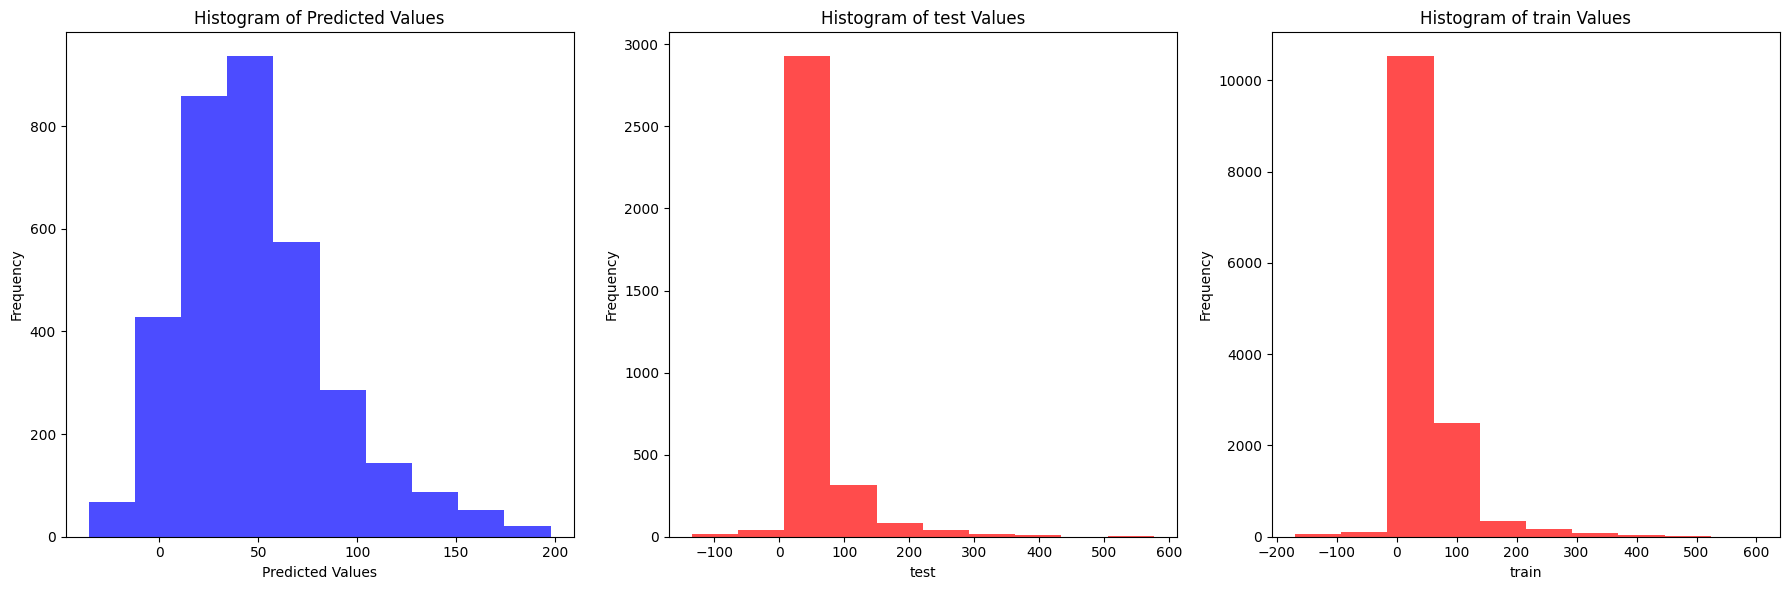

In [71]:


# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot histogram for predicted values
axs[0].hist(predict, bins=10, color='blue', alpha=0.7)
axs[0].set_title('Histogram of Predicted Values')
axs[0].set_xlabel('Predicted Values')
axs[0].set_ylabel('Frequency')

# Plot histogram for true values
axs[1].hist(y_test, bins=10, color='red', alpha=0.7)
axs[1].set_title('Histogram of test Values')
axs[1].set_xlabel('test')
axs[1].set_ylabel('Frequency')

axs[2].hist(y_train, bins=10, color='red', alpha=0.7)
axs[2].set_title('Histogram of train Values')
axs[2].set_xlabel('train')
axs[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()




-882.4893995908016
